# **PRELIM EXAMINATION**

PROFESSOR: ENGR. ROMAN

MEMBERS:

CABERTE, Sky Aebril

MUYRONG, Leann Jeffrey N.


Choose any dataset applicable for classification and/or prediction analysis problems.
Show the application of the following algorithms:
Linear Regression

*   Singular LR
*   Multiple LR
*   Polynomial LR
*   Logistic Regression
*   Decision Tree
*   Random Forest List


Provide Evaluation reports for all models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import linear_model
df = pd.read_csv("/content/diabetes.csv")

In [2]:
#linear_regression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df = df[df['SkinThickness'] != 0]
df = df[df['BMI'] != 0]

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               539 non-null    int64  
 1   Glucose                   539 non-null    int64  
 2   BloodPressure             539 non-null    int64  
 3   SkinThickness             539 non-null    int64  
 4   Insulin                   539 non-null    int64  
 5   BMI                       539 non-null    float64
 6   DiabetesPedigreeFunction  539 non-null    float64
 7   Age                       539 non-null    int64  
 8   Outcome                   539 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,3.525046,119.858998,71.204082,29.176252,113.538033,32.895733,0.502451,31.597403,0.333952
std,3.324018,32.946653,13.027106,10.489706,122.861998,6.871851,0.343215,10.744380,0.472061
min,0.000000,0.000000,0.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,0.000000,27.850000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.415000,28.000000,0.000000
75%,5.000000,140.500000,80.000000,36.000000,165.000000,36.900000,0.659000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Show correlated values with the Outcome
df.corr()['BMI']

Pregnancies                 0.019481
Glucose                     0.231412
BloodPressure               0.287365
SkinThickness               0.648214
Insulin                     0.188154
BMI                         1.000000
DiabetesPedigreeFunction    0.152771
Age                         0.081676
Outcome                     0.308708
Name: BMI, dtype: float64

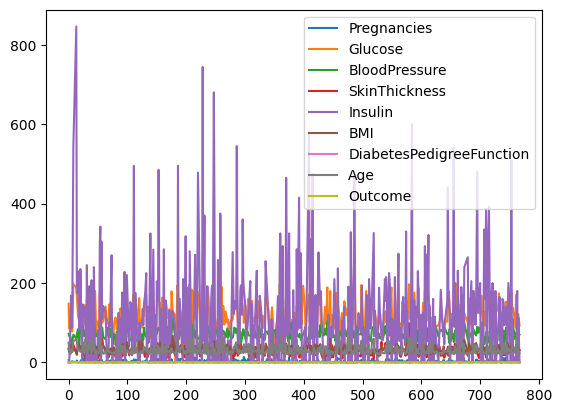

In [8]:
df.plot()
plt.show
%matplotlib inline

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.SkinThickness, df.BMI)


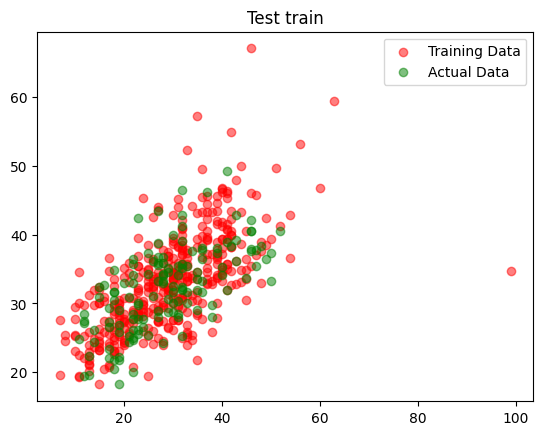

In [10]:
plt.scatter(X_train, y_train, label ='Training Data', color ='r', alpha=.5)
plt.scatter(X_test, y_test, label ='Actual Data', color ='g', alpha=.5)
plt.legend()
plt.title("Test train")
plt.show
%matplotlib inline

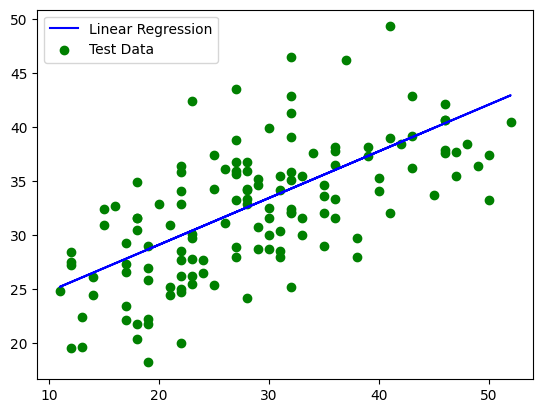

In [11]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label  = 'Linear Regression', color ='b')
plt.scatter(X_test, y_test, label='Test Data', color='g')
plt.legend()
plt.show
%matplotlib inline

In [12]:
#Testing to predict data
LR.predict(np.array([[50]]))[0]

42.06395312551171

In [13]:
#score of model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.39327664706216603

MULTIPLE LINEAR REGRESSION

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               539 non-null    int64  
 1   Glucose                   539 non-null    int64  
 2   BloodPressure             539 non-null    int64  
 3   SkinThickness             539 non-null    int64  
 4   Insulin                   539 non-null    int64  
 5   BMI                       539 non-null    float64
 6   DiabetesPedigreeFunction  539 non-null    float64
 7   Age                       539 non-null    int64  
 8   Outcome                   539 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.1 KB


In [15]:
df.corr()['BMI']

Pregnancies                 0.019481
Glucose                     0.231412
BloodPressure               0.287365
SkinThickness               0.648214
Insulin                     0.188154
BMI                         1.000000
DiabetesPedigreeFunction    0.152771
Age                         0.081676
Outcome                     0.308708
Name: BMI, dtype: float64

In [16]:
#DROPPING DATA WITH LOWEST CORRELATION to BMI
df= df.drop(['Pregnancies', 'Age'], axis = 1)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,35,0,33.6,0.627,1
1,85,66,29,0,26.6,0.351,0
3,89,66,23,94,28.1,0.167,0
4,137,40,35,168,43.1,2.288,1
6,78,50,32,88,31.0,0.248,1
...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,1
763,101,76,48,180,32.9,0.171,0
764,122,70,27,0,36.8,0.340,0
765,121,72,23,112,26.2,0.245,0


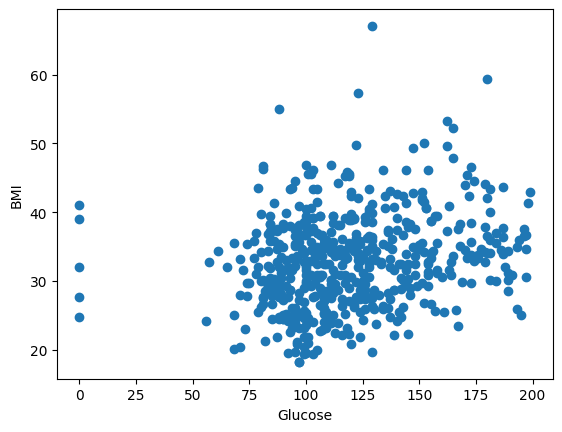

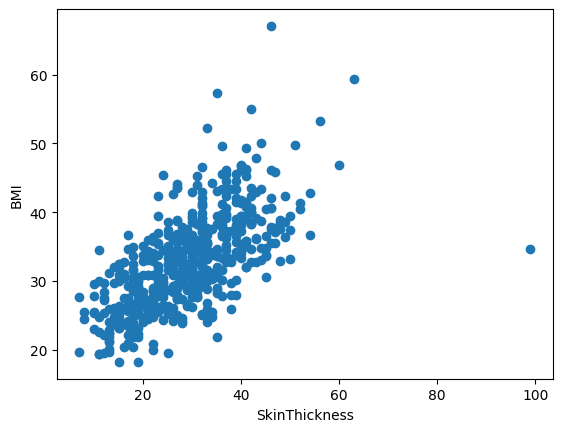

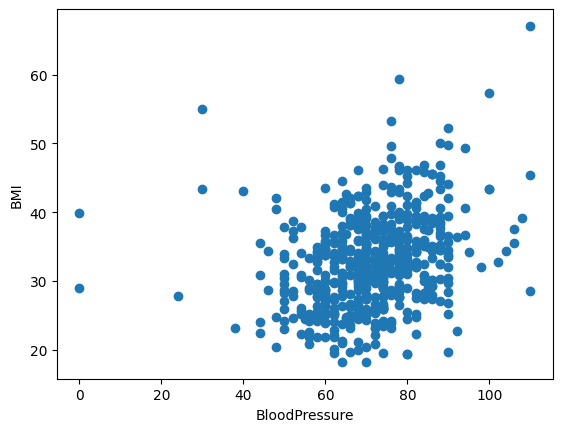

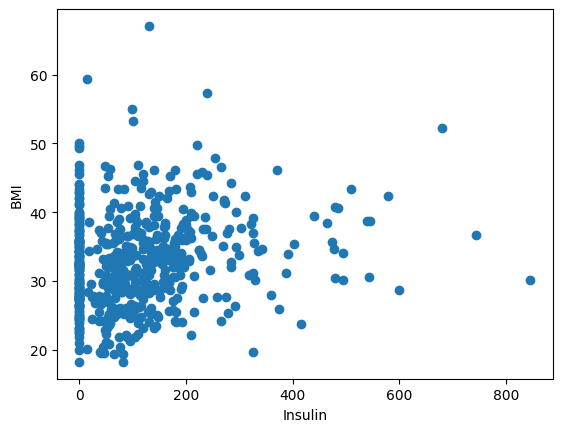

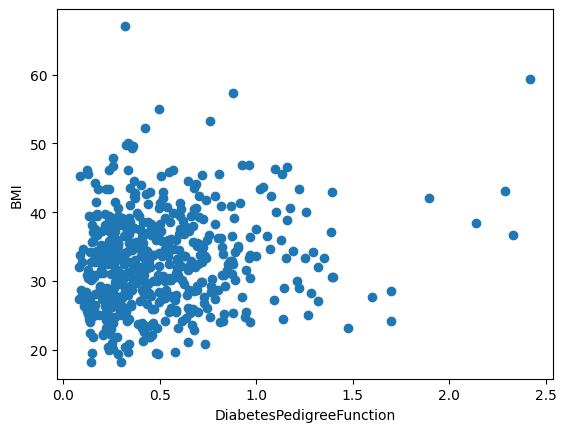

In [17]:
#individual graphs of correlation

plt.scatter(df['Glucose'], df['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

plt.scatter(df['SkinThickness'], df['BMI'])
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.show()

plt.scatter(df['BloodPressure'], df['BMI'])
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.show()

plt.scatter(df['Insulin'], df['BMI'])
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.show()

plt.scatter(df['DiabetesPedigreeFunction'], df['BMI'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('BMI')
plt.show()

In [18]:
#Evaluating the model
from sklearn.linear_model import LinearRegression
y = df['Outcome']
reg = linear_model.LinearRegression()
reg.fit(df[['Glucose', 'SkinThickness', 'BloodPressure', 'Insulin']],df.BMI)
coef = reg.coef_
intercept = reg.intercept_
print('Coefficients', coef)
print('intercept', coef)




Coefficients [0.00643852 0.39144632 0.07778105 0.00530879]
intercept [0.00643852 0.39144632 0.07778105 0.00530879]


In [ ]:
#polynomial Linear Regression

Mean Squared Error: 62.129433098749615
R-squared: 0.4343116387848689


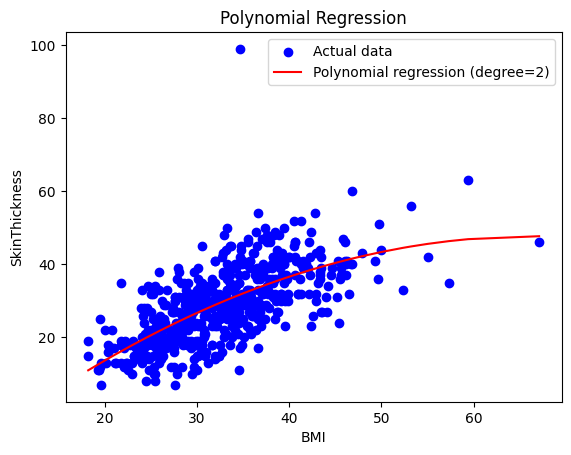

In [41]:

X = df[['BMI']]
y = df['SkinThickness']
degree = 2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print('R-squared:', r2_score(y, y_pred))
# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
X_sorted, y_pred_sorted = zip(*sorted(zip(X.values, y_pred)))
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial regression (degree=' + str(degree) + ')')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('Polynomial Regression')
plt.legend()

LOGISTIC REGRESSION

In [21]:
X = df[['Glucose', 'SkinThickness', 'BloodPressure','Insulin']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[61 13]
 [15 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        74
           1       0.59      0.56      0.58        34

    accuracy                           0.74       108
   macro avg       0.70      0.69      0.69       108
weighted avg       0.74      0.74      0.74       108



In [22]:
model_LR = LogisticRegression(C=10)
model_LR.fit(X_train,y_train)

LogisticRegression(C=10)

In [23]:
score_LR_train = model_LR.score(X_train,y_train)
print(f"Train accuracy: {score_LR_train}")

Train accuracy: 0.7819025522041764


In [24]:
score_LR_test = model_LR.score(X_test,y_test)
print(f"Test accuracy: {score_LR_test}")

Test accuracy: 0.7314814814814815


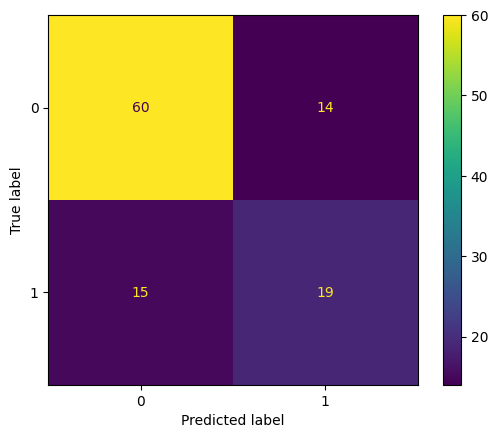

In [25]:
ConfusionMatrixDisplay.from_estimator(model_LR,X_test,y_test);

**DECISION TREE ALGORITHM**

In [ ]:
#SPLITTING data into training and testing sets

In [26]:
all_data = pd.read_csv("/content/diabetes.csv")

y_target = df["Outcome"].values

columns = ["Glucose", "SkinThickness", "BloodPressure", "Insulin", "DiabetesPedigreeFunction"]
X_input = df[list(columns)].values

from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)


X = all_data[list(columns)].values
y = all_data["Outcome"].values
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)


#train test score
print ('test score=')
clf_train.score(X_input, y_target)

test score=


0.7699443413729128

In [27]:
# Printing
from six import StringIO
with open("diabetes", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [29]:
!dot -Tpng /content/diabetes -o /content/diabetes.png

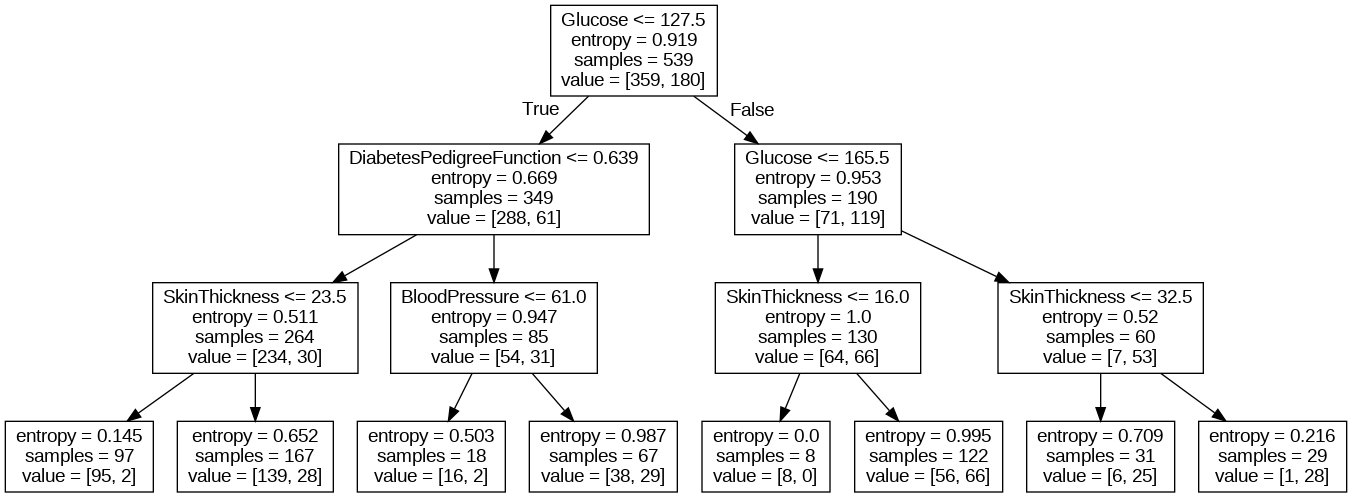

In [30]:
from IPython.display import Image
Image("/content/diabetes.png")

In [31]:
# testing of data
columns = ["Glucose", "SkinThickness", "BloodPressure", "Insulin", "DiabetesPedigreeFunction"]
X_input = df[list(columns)].values


In [32]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7369565217391304 Testing score = 0.7435064935064936


Random Forest


In [33]:
df.corr(method='pearson')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Glucose,1.000000,0.209820,0.210895,0.459226,0.231412,0.165318,0.464466
BloodPressure,0.209820,1.000000,0.218853,0.028083,0.287365,0.000130,0.167227
SkinThickness,0.210895,0.218853,1.000000,0.125384,0.648214,0.120578,0.258356
Insulin,0.459226,0.028083,0.125384,1.000000,0.188154,0.151501,0.206811
BMI,0.231412,0.287365,0.648214,0.188154,1.000000,0.152771,0.308708
DiabetesPedigreeFunction,0.165318,0.000130,0.120578,0.151501,0.152771,1.000000,0.233312
Outcome,0.464466,0.167227,0.258356,0.206811,0.308708,0.233312,1.000000


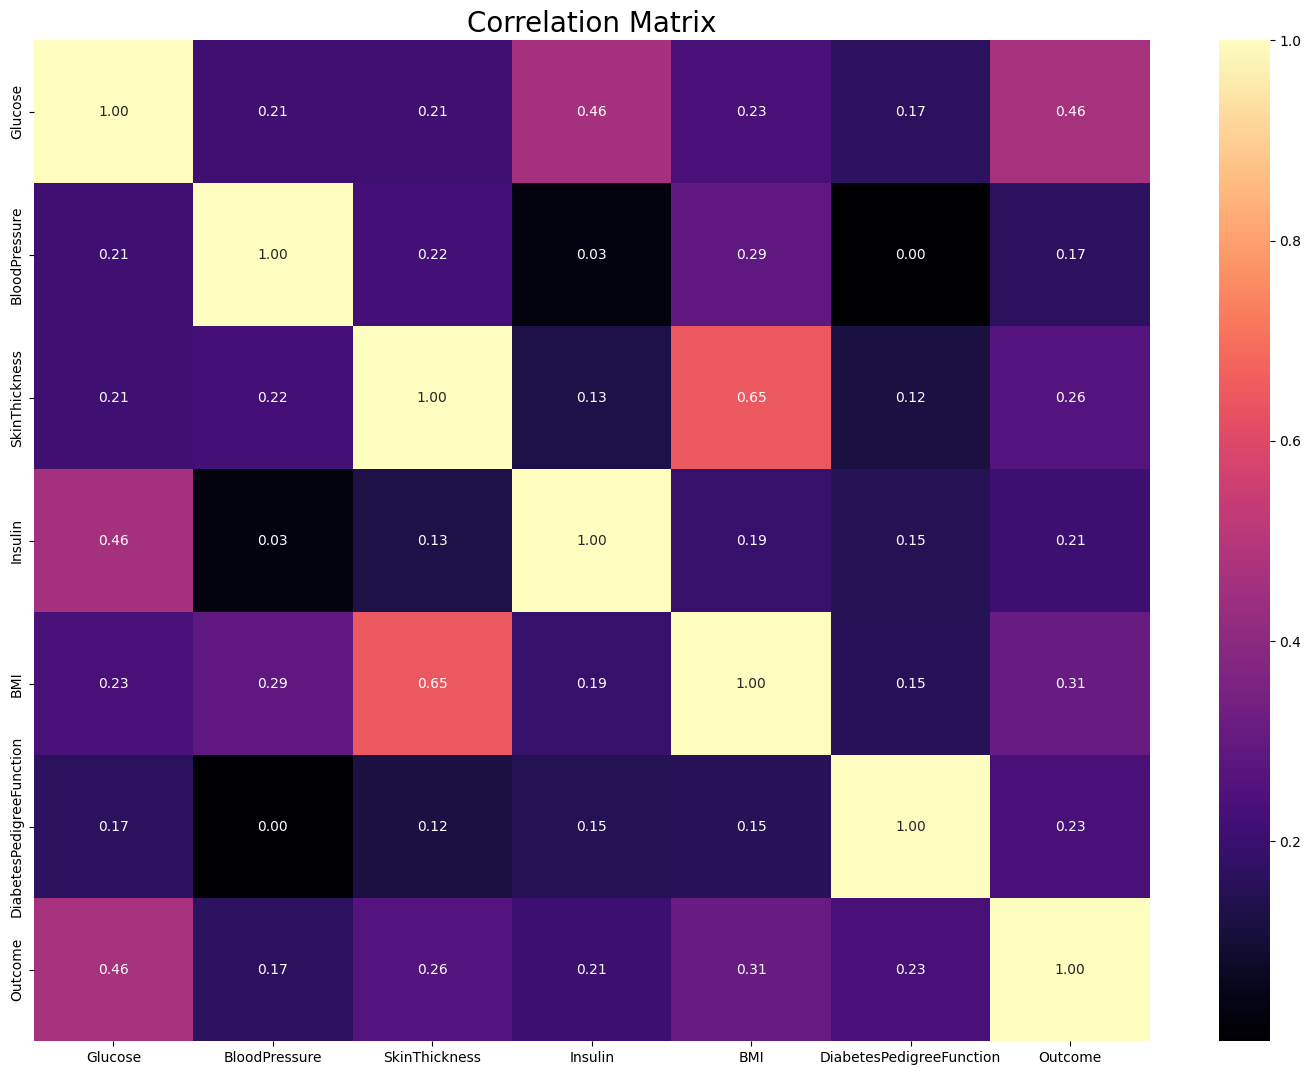

In [34]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [35]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness','BMI']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[59 15]
 [16 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        74
           1       0.55      0.53      0.54        34

    accuracy                           0.71       108
   macro avg       0.67      0.66      0.66       108
weighted avg       0.71      0.71      0.71       108



In [36]:
model_RFC = RandomForestClassifier(n_estimators=10)
model_RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [37]:
score_RFC_train = model_RFC.score(X_train,y_train)
print(f"Train accuracy: {score_RFC_train}")

Train accuracy: 0.974477958236659


In [38]:
score_RFC_test = model_RFC.score(X_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

Test accuracy: 0.7222222222222222


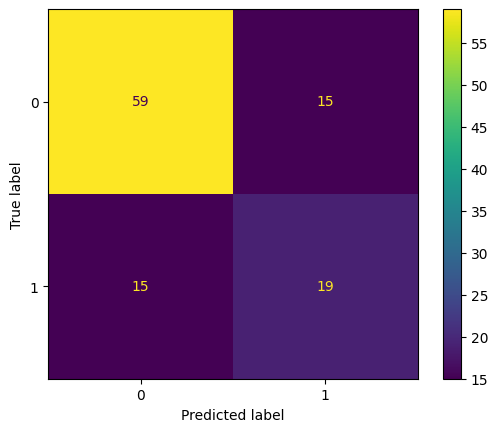

In [39]:
  ConfusionMatrixDisplay.from_estimator(model_RFC,X_test,y_test);
 #ConfusionMatrixDisplay